In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Collaborator: Sky Kapoor

# A Notch Digital Filter (6 marks, 3/2/1)

A notch filter is a filter that passes almost all frequencies with unit amplitude, except for a narrow
range of frequencies centered on the rejection frequency $f_0$ (at which frequency nothing is passed).

A simple notch digital filter has a z-transform

$$ W(z) = MF(z) F(z^*)^* = M \frac{z - q}{z - p} \frac{z - q^*}{z - p^*} $$

where $M$ is a normalization factor, $q = e^{-i 2 \pi f_0 / f_s}$, $p = (1 + \epsilon) q$, $f_s$ 
is the sampling rate ($f_s = 1 / \Delta$) and $\epsilon$ is a small positive number ($0 < \epsilon \ll 1$).

 1. What are the poles and zeros of this system? Where are they located with respect to the unit
    circle? Is this a stable system? Is this filter real? 
 2. Given $f_s = 12 \text{ cycles/year}$, $f_0 = 1 \text{ cycle/year}$, $M = 1.05$ and $\epsilon = 0.05$, plot the
    power spectrum $|W(f)|^2=W(f)W(f)^\ast$ (i.e., square of amplitude spectrum). Sample densely in $[-f_s/2, \ldots, f_s/2]$ (e.g. 1000 points), where $f_s/2$ is the Nyquist frequency.
 3. What is the full-width-half-max (FWHM) value $f_\text{fwhm}$ of this notch filter (based on the plot)? Which parameter(s) should you change to make the notches sharper, i.e., $f_\text{fwhm}$ smaller?

_Hint_: For question 2, $W(f)$ is obtained by $W(z = e^{-i \omega \Delta}$). For question 3, you don't have to
compute the FWHM value analytically (although it can be done); an inspection of the discrete array of $|W(f)|^2$
vector is sufficient. Note here $f_\text{fwhm}$ is in terms of frequency (1/year), not angular frequency.

-----------------------------------------------------------------------
QUESTION 1

The poles are when W(z) goes to $\infty$ and the zeros are when W(z) goes to zero. Thus the poles of W(z) are when 
$z = p = (1+\epsilon)e^{\frac{-i2\pi f_0}{f_s}}$ and when 
$z = p^* = (1+\epsilon)e^{\frac{i2\pi f_0}{f_s}}$ 
and the zeros are when 
$z = q = e^{\frac{-i2\pi f_0}{f_s}}$
or when
$z = q^* = e^{\frac{i2\pi f_0}{f_s}}$.

Since $\epsilon$ is positive and q is always positive, p is always going to be greater than one, so the poles are outside the unit circle. The zeros are in the unit circle, thus the system is stable.

The filter is real because $W(z) = W^*(z)$





-----------------------------------------------------------------------
QUESTION 2

C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '|W(f)|^2')

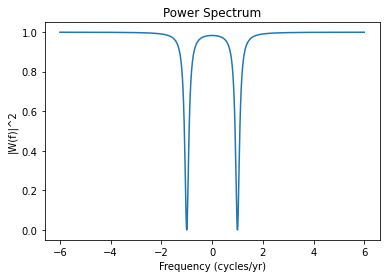

In [2]:
fs = 12
f0 = 1
M = 1.05
e = 0.05
delta = 1/fs
q = np.e**(-1j*2*np.pi*f0/fs)
p = (1+e)*q
Range = np.linspace(-fs/2, fs/2, 1000)

z = np.e**(-1j*2*np.pi*Range*delta)
qstar = np.conj(q)
pstar = np.conj(p)

W = M*((z-q)/(z-p))*((z-qstar)/(z-pstar))

plt.plot(Range, W*np.conj(W))
plt.title("Power Spectrum")
plt.xlabel("Frequency (cycles/yr)")
plt.ylabel("|W(f)|^2")

-----------------------------------------------------------------------
QUESTION 3

Zooming in on the graph, we see the FWHM value is about 0.2 cycles per year.

C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.5, 1.0)

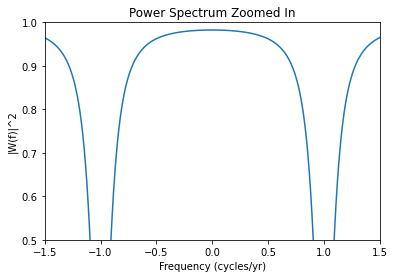

In [3]:
plt.plot(Range, W*np.conj(W))
plt.title("Power Spectrum Zoomed In")
plt.xlabel("Frequency (cycles/yr)")
plt.ylabel("|W(f)|^2")
plt.xlim(-1.5,1.5)
plt.ylim(0.5, 1)

# Implementing the Notch Filter (6 marks, 2/2/1/1)

Notch filter introduced in section 1 can be written out fully as

$$ W(z) = \frac{N(z)}{D(z)} = \frac{a + bz + cz^2}{1 + Bz + Cz^2} $$

A filter of the form above can be implemented as two filters in succession: first the 'numerator filter'
`[a b c]` as a 3-term direct convolution, then the 'denominator filter' as the inverse filter of the 3-term
filter `[1 B C]` by feedback filtering.

 1. What are the values of a; b; c; B; C for the notch filter defined in question 1.2?
 2. Write a function for a general rational digital filter with numerator and denominator
    coefficients N and D which produces the filtered time series $y$ for a given input $x$,
    `y = ratFilter(N,D,x)`. 
 3. Use `ratFilter` function to determine the impulse response of this notch filter (i.e., the output
    of this filter when the input is a discrete delta function). Define the impulse using $dt=1/f_s$ and $t=0$ to $t_{max}=100$ years (i.e. $1200$ samples). Plot the impulse response from $0$ to $6$ years. Speculate on how the impulse response would change if we halve the $f_\text{fwmh}$ value.
 4. Fourier transform the impulse response to obtain the frequency response $|W(f)|$
    of this notch filter. Plot it on top of the magnitude of the theoretical spectrum calculated based on the z-transform, with $f$ ranging from $0$ to $6$ cycles per year.

-----------------------------------------------------------------------
QUESTION 1


Expanding out W gives:

$$\frac{z^2 + (q^* - q)z + |q|^2}{z^2 + (p^* - p)z + |p|^2}$$

Noticing that the $|p|^2$ part is 1, we can divide the numerator and denominator by $|p|^2$. By doing this, we get:

$$a = M\frac{|q|^2}{|p|^2}$$

$$b = -M\frac{q^* - q}{|p|^2}$$

$$c = M\frac{1}{|p|^2}$$

$$B = \frac{p^* - p}{|p|^2}$$

$$C = \frac{1}{|p|^2}$$

-----------------------------------------------------------------------
QUESTION 2

In [27]:
def ratFilter(N, D, x):
    numFilter = np.convolve(N, x)
    y = np.zeros(x.size)
    y[0] = 1
    for i in range(y.size):
        a = []
        M = 3
        for k in range(1,M):
            if i - k >= 0:
                a.append(D[k]*y[i-k])
                y[i] = (1/a[0])*(numFilter[i]-np.sum(a))
    return y

-----------------------------------------------------------------------
QUESTION 3

Using values from question one, we get:

$|p^2| = 1.1025$

$|q^2| = 1$

$M = 1.05$

$q^* - q = 2$

$p^* - p = 2.1$

Using these values, we get the following:

Text(0, 0.5, 'Impulse Response')

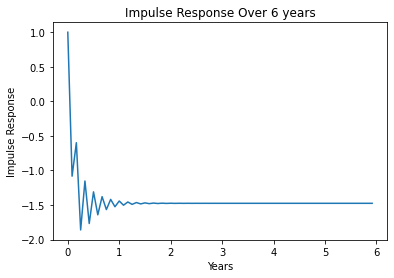

In [28]:
a = 0.9524
b = -1.905
c = 0.9524
A = 1
B = 1.905
C = 0.90703

N = [a, b, c]
D = [A, B, C]
x = np.zeros(1200)
x[0] = delta
years = np.arange(0, 100, delta)

y = ratFilter(N, D, x)

plt.plot(years[:72],y[:72])
plt.title("Impulse Response Over 6 years")
plt.xlabel("Years")
plt.ylabel("Impulse Response")

If we half the $f_{fwmh}$ value, the number of cycles per year would decrease and thus the oscillations in the impulse response would decrease with time (frequency of oscillations would decrease).

-----------------------------------------------------------------------
QUESTION 4

C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Impulse Response')

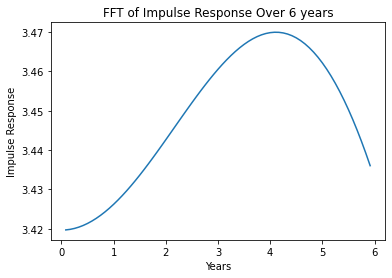

In [42]:
y_fft = np.fft.fft(y)

plt.plot(years[1:72],y_fft[1:72])
plt.title("FFT of Impulse Response Over 6 years")
plt.xlabel("Years")
plt.ylabel("Impulse Response")

C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Spectrum')

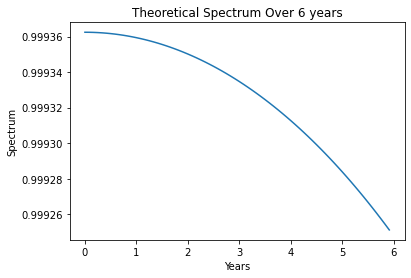

In [43]:
plt.plot(years[0:72], W[0:72])

plt.title("Theoretical Spectrum Over 6 years")
plt.xlabel("Years")
plt.ylabel("Spectrum")

# The Mauna Loa $CO_2$ Data (6 marks, 1/1/1/1/2)

The provided file `co2data.py` contains carbon dioxide values (in parts per million) measured
every month at the Mauna Loa Observatory in Hawaii, from January 1965 to December 2021.
They show clearly a rising trend in atmospheric $CO_2$. The trend is overlaid with a strong annual
oscillation. Your job is to remove the annual oscillation and display the trend more clearly. There
are two possible approaches: (a) you could apply your notch filter to the series to remove this
annual variation, or (b) you could Fourier transform it with `fft`, remove the annual variation by
setting the spectrum at appropriate frequencies to zero, and transform back to the time domain with
`ifft`.

Write code to accomplish the following:

 1. Before applying the filters, it is helpful to remove the trend of the signal using numpy
    function `polyfit`. Fit a straight line to your data and then detrend your data by removing the
    straight line. Plot both the original data and the detrended data.
 2. Apply your notch filter to the detrended data and add back the trend.
 3. FT the detrended data into the frequency domain, and plot both its amplitude and phase
    spectrum. Make another plot that zooms in at $f = [0, 3.5]$ cycles per year. Now set the
    Fourier spectrum corresponding to frequencies beyond $0.9$ cycles per year to zero (keeping in mind symmetry requirements), which
    effectively removes the annual oscillation. Transform the spectrum back to time domain and
    add back the trend.
 4. Now plot the original data, the notch-filtered data from Part 2 and f-domain filtered data
    from Part 3 on top of each other with different colors. Which method gives more satisfactory
    result? But can you think of any advantages/disadvantages in using either method?
 5. Now try redo Parts 2, 3, and 4 with the original data, not the detrended data. Of course you
    don't need to add back the trend after filtering any more. Display your results and comment
    on the importance of detrending before applying the filters.

-----------------------------------------------------------------------
QUESTION 1

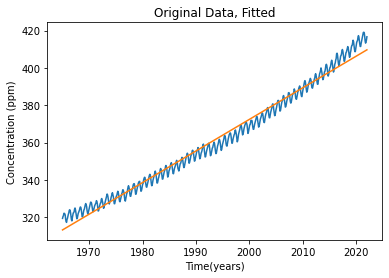

In [67]:
from co2data import co2Data, co2TimeRange

time=np.linspace(co2TimeRange[0],co2TimeRange[1],len(co2Data))

fit = np.polyfit(time, co2Data, 1)
detrended_data = co2Data - np.polyval(fit, time)

plt.plot(time, co2Data, label = "data")
plt.title("Original Data, Fitted")
plt.ylabel("Concentration (ppm)")
plt.xlabel("Time(years)")

plt.plot(time, np.polyval(fit, time))

Text(0, 0.5, 'Concentration (ppm)')

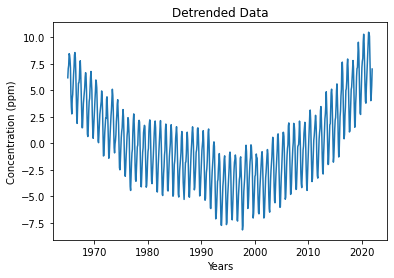

In [66]:
plt.plot(time, detrended_data)
plt.title("Detrended Data")
plt.xlabel("Years")
plt.ylabel("Concentration (ppm)")

-----------------------------------------------------------------------
QUESTION 2

In [70]:
notch_data = ratFilter(N,D,detrended_data)
notch_data = notch_data + np.polyval(fit, time)

-----------------------------------------------------------------------
QUESTION 3

Text(0, 0.5, 'Amplitude')

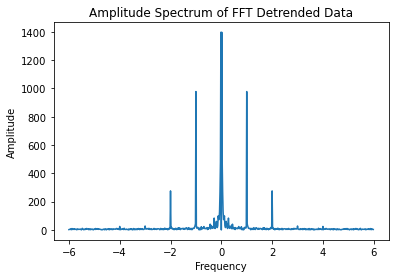

In [77]:
FT_data = np.fft.fftshift(np.fft.fft(detrended_data))
freq = np.fft.fftshift(np.fft.fftfreq(detrended_data.size, time[1]-time[0]))
plt.plot(freq, np.abs(FT_data))

plt.title("Amplitude Spectrum of FFT Detrended Data")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Phase')

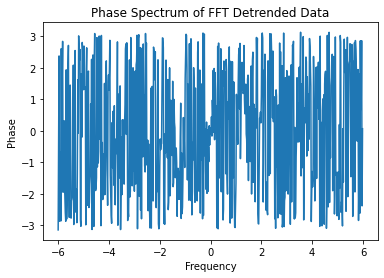

In [78]:
plt.plot(freq, np.angle(FT_data))

plt.title("Phase Spectrum of FFT Detrended Data")
plt.xlabel("Frequency")
plt.ylabel("Phase")

Zooming in gives the following:

Text(0, 0.5, 'Amplitude')

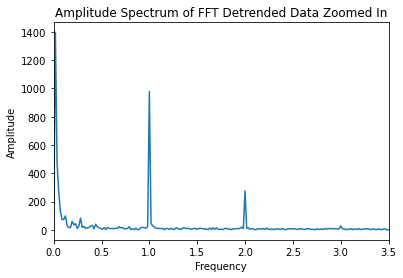

In [79]:
plt.plot(freq, np.abs(FT_data))

plt.title("Amplitude Spectrum of FFT Detrended Data Zoomed In")
plt.xlim(0,3.5)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Phase')

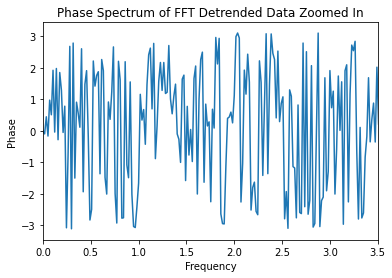

In [80]:
plt.plot(freq, np.angle(FT_data))

plt.title("Phase Spectrum of FFT Detrended Data Zoomed In")
plt.xlim(0,3.5)
plt.xlabel("Frequency")
plt.ylabel("Phase")

In [ ]:
for i in range(FT_data.size):
    if np.abs(freq[i]) >0.9:
        freq[i] = 0
        
trans = np.fft.ifft(FT_data) + np.polyval(fit, time)

-----------------------------------------------------------------------
QUESTION 4

C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Concentration (ppm)')

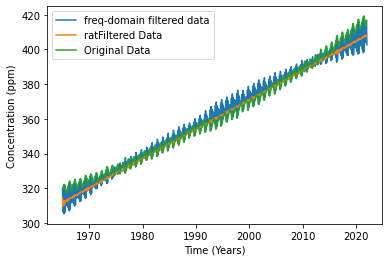

In [91]:
plt.plot(time, trans, label = "freq-domain filtered data")
plt.plot(time, notch_data, label = "ratFiltered Data")
plt.plot(time, co2Data, label = "Original Data")
plt.legend()
plt.xlabel("Time (Years)")
plt.ylabel("Concentration (ppm)")

The frequency domain filtered data is closest to the original data and so it is the more satisfactory method. The ratFilter Data method could be useful when wanting to view the general trand of the data as it is more inear than the other methods.

-----------------------------------------------------------------------
QUESTION 5

Text(0, 0.5, 'Amplitude')

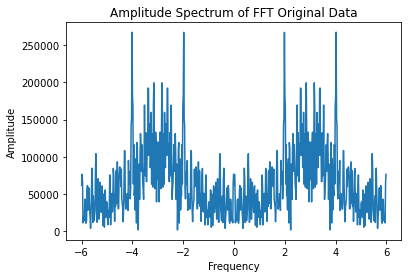

In [100]:
original_notch = ratFilter(D,N,co2Data)

FT_origdata = np.fft.fftshift(np.fft.fft(original_notch))
freq2 = np.fft.fftshift(np.fft.fftfreq(co2Data.size, time[1]-time[0]))
plt.plot(freq2, np.abs(FT_origdata))

plt.title("Amplitude Spectrum of FFT Original Data")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Phase')

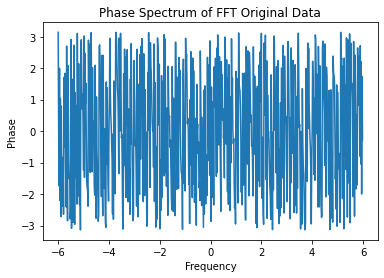

In [101]:
plt.plot(freq2, np.angle(FT_origdata))

plt.title("Phase Spectrum of FFT Original Data")
plt.xlabel("Frequency")
plt.ylabel("Phase")

Zooming in gives the following:

(0.0, 3.5)

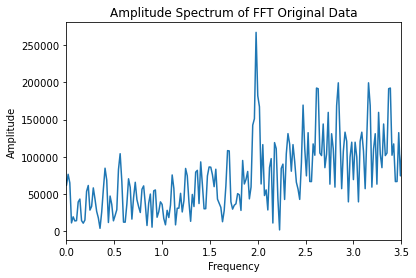

In [102]:
plt.plot(freq2, np.abs(FT_origdata))

plt.title("Amplitude Spectrum of FFT Original Data")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0,3.5)

(0.0, 3.5)

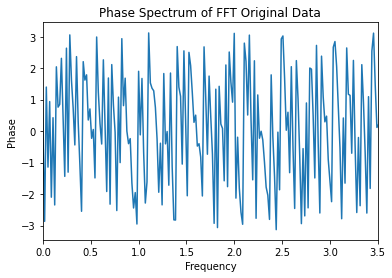

In [103]:
plt.plot(freq2, np.angle(FT_origdata))

plt.title("Phase Spectrum of FFT Original Data")
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.xlim(0,3.5)

C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Original Data With Filters')

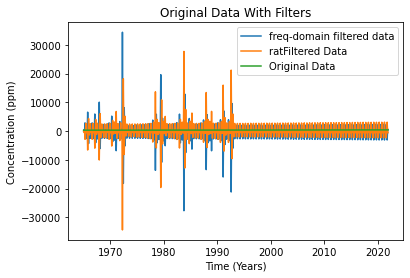

In [106]:
for i in range(FT_origdata.size):
    if np.abs(freq2[i]) >0.9:
        freq2[i] = 0
        
trans2 = np.fft.ifft(FT_origdata)

plt.plot(time, trans2, label = "freq-domain filtered data")
plt.plot(time, original_notch, label = "ratFiltered Data")
plt.plot(time, co2Data, label = "Original Data")
plt.legend()
plt.xlabel("Time (Years)")
plt.ylabel("Concentration (ppm)")
plt.title("Original Data With Filters")

It is important to detrend data before applying filters so the filtered data fits the original data better. As evident, this is not the case in the plot above.